# Entrega MongoDB: Comparativa del acceso a las finanzas a nivel país

En este trabajo vamos a intentar analizar la situación de acceso a finanzas básicas comparando la situación en diferentes países. Para ello me he descargado varios indicadores obtenidos del Fondo Monetario Internacional, en concreto del Finance Access Survey:

https://data.imf.org/?sk=388DFA60-1D26-4ADE-B505-A05A558D9A42&sId=1479329132316

Los indicadores que me he descargado son los siguientes:

FCAK_NUM: Número de cajeros automáticos por 1.000 km2

FCAA_NUM: Número de cajeros automáticos por 100.000 adultos

FCBODCK_NUM: Número de sucursales de bancos comerciales por 1.000 km2 

FCAODCHMMA_NUM: Número de cuentas de depósito propiedad de hombres del sector hogares en bancos comerciales por cada 1.000 adultos varones

FCAODCHFFA_NUM: Número de cuentas de depósito propiedad de mujeres del sector hogares en bancos comerciales por cada 1 000 mujeres adultas

FCMIBT_NUM: Número de transacciones bancarias por móvil y por Internet (durante el año de referencia)

FCROFNMF_NUM: Utilización de servicios financieros, número de prestatarios, instituciones microfinancieras que no captan depósitos

Los datos me los he descargado en modo datos de panel, lo que da más juego porque puedo ver los indicadores arriba mencionados para 180 países diferentes y para un período de 18 años (de 2004 a 2021).

El acceso a servicios financieros básicos es crucial para que un país pueda crecer económicamente, imáginate cómo sería tu vida sin cuenta bancaria o sin poder bizums... Por eso me parece muy interesante ver las diferencias que existen entre países.

## Importar los datos

In [60]:
import pymongo

In [61]:
# Poner la dirección y el puerto reales del servidor
mongo_server = "localhost"
mongo_port = 27017

# Establecer el cliente
client = pymongo.MongoClient(f"mongodb://{mongo_server}:{mongo_port}/")

# Crear la base de datos
db = client["mydb"]

# Crear la colección
collection = db["mycollection"]


In [63]:
from pymongo import MongoClient

# Replace the placeholders with your actual MongoDB server's address and port
mongo_server = "localhost"
mongo_port = 27017

# Establish a connection to the MongoDB server
client = MongoClient(f"mongodb://{mongo_server}:{mongo_port}/")

# Access the 'mydb' database
db = client["mydb"]

# Access the 'mycollection' collection
collection = db["mycollection"]

# Delete all documents in the collection
result = collection.delete_many({})

print(f"Deleted {result.deleted_count} documents.")


Deleted 0 documents.


In [64]:
import csv

# Describir la ruta
csv_file_path = r"G:\Mi unidad\Documentos\MASTER UCM\NOSQL\datos\FAS_05-15-2023 17-59-27-37_panel\FAS_05-15-2023 17-59-27-37_panel.csv"
# Read the CSV file and convert it into a list of dictionaries
with open(csv_file_path, encoding='utf-8-sig') as csvfile:
    reader = csv.DictReader(csvfile)
    data = [row for row in reader]

# Insert the list of dictionaries into the MongoDB collection
insert_result = collection.insert_many(data)
print(f"Inserted {len(insert_result.inserted_ids)} documents into the collection")


Inserted 3237 documents into the collection


## Ejercicios sobre inserción, actualización, proyección y filtrado / Ejercicios sobre pipeline de agregación

In [65]:
# Hacer una query a la colección
results = collection.find().limit(10)

# mostrar resultados
for result in results:
    print(result)

{'_id': ObjectId('64667ddee3cc81f0117e7fac'), 'Country Name': 'Niger', 'Country Code': '692', 'Time Period': '2004', 'Key Indicators, Geographical Outreach, Number of ATMs per 1,000 km2 (FCAK_NUM)': '', 'Status': 'NA', 'Key Indicators, Geographical Outreach, Number of ATMs per 100,000 adults (FCAA_NUM)': '', 'Key Indicators, Geographical Outreach, Number of commercial bank branches per 1,000 km2 (FCBODCK_NUM)': '0.027630851819689', 'Key Indicators, Use of Financial Services, Number of men-owned deposit accounts of the household sector with commercial banks per 1,000 male adults (FCAODCHMMA_NUM)': '', 'Key Indicators, Use of Financial Services, Number of women-owned deposit accounts of the household sector with commercial banks per 1,000 female adults (FCAODCHFFA_NUM)': '', 'Use of Financial Services, Mobile and internet banking (for commercial banks only), Number of mobile and internet banking transactions (during the reference year) (FCMIBT_NUM)': '', 'Use of Financial Services, Numbe

Con este vistazo rapido se puede ver que los campos tienen un nombre muy largo, por lo que voy a dejar solo el código para facilitar la visualización:

In [66]:
# Actualizar los nombres de los campos del dataset

client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["mydb"]
collection = db["mycollection"]

# Rename one field
collection.update_many({}, {"$rename": {"Key Indicators, Geographical Outreach, Number of ATMs per 1,000 km2 (FCAK_NUM)": "FCAK_NUM"}})

collection.update_many({}, {"$rename": {"Key Indicators, Geographical Outreach, Number of ATMs per 100,000 adults (FCAA_NUM)": "FCAA_NUM"}})

collection.update_many({}, {"$rename": {"Key Indicators, Geographical Outreach, Number of commercial bank branches per 1,000 km2 (FCBODCK_NUM)": "FCBODCK_NUM"}})

collection.update_many({}, {"$rename": {"Key Indicators, Use of Financial Services, Number of men-owned deposit accounts of the household sector with commercial banks per 1,000 male adults (FCAODCHMMA_NUM)": "FCAODCHMMA_NUM"}})

collection.update_many({}, {"$rename": {"Key Indicators, Use of Financial Services, Number of women-owned deposit accounts of the household sector with commercial banks per 1,000 female adults (FCAODCHFFA_NUM)": "FCAODCHFFA_NUM"}})

collection.update_many({}, {"$rename": {"Use of Financial Services, Mobile and internet banking (for commercial banks only), Number of mobile and internet banking transactions (during the reference year) (FCMIBT_NUM)": "FCMIBT_NUM"}})

collection.update_many({}, {"$rename": {"Use of Financial Services, Number of Borrowers, Non-deposit taking microfinance institutions (FCROFNMF_NUM)": "FCROFNMF_NUM"}})


También voy a quitar los campos de country code y status que no aportan info útil para el análisis

In [67]:
# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["mydb"]
collection = db["mycollection"]

# Remove 'Status' and 'Country Code' fields
collection.update_many({}, {"$unset": {"Status": "", "Country Code": "","<field_name>": ""}})

In [68]:
import pandas as pd

# create a MongoClient to the running mongod instance
client = pymongo.MongoClient('localhost', 27017)

# select your database
db = client['mydb']

# select your collection within the database
collection = db.mycollection

# make a query to the collection
results = collection.find().limit(10)

# convert the results to a pandas DataFrame
df = pd.DataFrame(list(results))
pd.set_option('display.max_columns', None)
df = df.drop('_id', axis=1)

# print the DataFrame
df

,Country Name,Time Period,,FCAK_NUM,FCAA_NUM,FCBODCK_NUM,FCAODCHMMA_NUM,FCAODCHFFA_NUM,FCMIBT_NUM,FCROFNMF_NUM
0,Niger,2004,,,,0.027630851819689,,,,
1,Niger,2005,,,,0.0371042867292966,,,,
2,Niger,2006,,,,0.0426304570932344,,,,
3,Niger,2007,,,,0.05368279782111,,,,
4,Niger,2008,,,,0.0647351385489855,,,,
5,Niger,2009,,,,0.0702613089129233,,,,
6,Niger,2010,,,,0.078945290913397,,,,
7,Niger,2011,,,,0.0844714612773348,,,,
8,Niger,2012,,,,0.108155048551354,,,,
9,Niger,2013,,,,0.119996842188363,,,,


Como se ve que hay muchos campos que están vacios vamos a contarlos $exists

In [69]:
# selecciona el primer documento de la colección para obtener los nombres de los campos
first_document = collection.find_one()
field_names = first_document.keys()

# itera sobre los nombres de los campos
for field_name in field_names:
    # omite los campos _id, Country Name y Time Period
    if field_name in ['_id', 'Country Name', 'Time Period', '']:
        continue

    # cuenta y muestra el número de documentos faltantes para este campo
    missing_values_count = collection.count_documents({field_name: {"$exists": False}})
    print(f"Número de missings {field_name}: {missing_values_count}")

    # cuenta y muestra el número de documentos con valores para este campo
    good_values_count = collection.count_documents({field_name: {"$exists": True}})
    print(f"Número de documentos con valores {field_name}: {good_values_count}")

Número de missings FCAK_NUM: 0
Número de documentos con valores FCAK_NUM: 3237
Número de missings FCAA_NUM: 0
Número de documentos con valores FCAA_NUM: 3237
Número de missings FCBODCK_NUM: 0
Número de documentos con valores FCBODCK_NUM: 3237
Número de missings FCAODCHMMA_NUM: 0
Número de documentos con valores FCAODCHMMA_NUM: 3237
Número de missings FCAODCHFFA_NUM: 0
Número de documentos con valores FCAODCHFFA_NUM: 3237
Número de missings FCMIBT_NUM: 0
Número de documentos con valores FCMIBT_NUM: 3237
Número de missings FCROFNMF_NUM: 0
Número de documentos con valores FCROFNMF_NUM: 3237


Se me había olvidado que en MongoDB, los campos que no están presentes en un documento y los campos que están presentes pero tienen un valor de null o una cadena vacía son cosas distintas. Si un campo no está presente en un documento, puedes considerarlo como un "missing" en el sentido de que el documento no tiene información para ese campo. Sin embargo, si un campo está presente pero tiene un valor de null o una cadena vacía, entonces ese campo no es considerado como un "missing" por MongoDB, porque el campo en realidad existe en el documento. Así que vamos a probar de otra forma:

In [70]:
# selecciona el primer documento de la colección para obtener los nombres de los campos
first_document = collection.find_one()
field_names = first_document.keys()

# itera sobre los nombres de los campos
for field_name in field_names:
    # omite los campos _id, Country Name, Time Period y campos con nombres vacíos
    if field_name in ['_id', 'Country Name', 'Time Period', '']:
        continue

    # cuenta y muestra el número de documentos con valores nulos o cadenas vacías para este campo
    null_values_count = collection.count_documents({field_name: {"$in": [None, ""]}})
    print(f"Número de nulls o cadenas vacías {field_name}: {null_values_count}")

    # cuenta y muestra el número de documentos con valores para este campo
    good_values_count = collection.count_documents({field_name: {"$exists": True, "$nin": [None, ""]}})
    print(f"Número de documentos con valores {field_name}: {good_values_count}")


Número de nulls o cadenas vacías FCAK_NUM: 284
Número de documentos con valores FCAK_NUM: 2953
Número de nulls o cadenas vacías FCAA_NUM: 280
Número de documentos con valores FCAA_NUM: 2957
Número de nulls o cadenas vacías FCBODCK_NUM: 115
Número de documentos con valores FCBODCK_NUM: 3122
Número de nulls o cadenas vacías FCAODCHMMA_NUM: 2911
Número de documentos con valores FCAODCHMMA_NUM: 326
Número de nulls o cadenas vacías FCAODCHFFA_NUM: 2911
Número de documentos con valores FCAODCHFFA_NUM: 326
Número de nulls o cadenas vacías FCMIBT_NUM: 2483
Número de documentos con valores FCMIBT_NUM: 754
Número de nulls o cadenas vacías FCROFNMF_NUM: 2785
Número de documentos con valores FCROFNMF_NUM: 452


Pues viendo los datos hay cuatro variables que tienen muchísimos celdas como cadena vacía, por lo que las conclusiones que se saquen con este análisis no serán muy realistas, pero a estas alturas no me voy a cambiar de datos...

Ahora vamos a probar a hacer a hacer un documento embebido, juntando los valores de FCAODCHMMA_NUM y FCAODCHFFA_NUM que se llamará N_DEPOSITS y dentro de este los valores de FCAODCHMMA_NUM estén precedidos por una M y los de FCAODCHFFA_NUM por F

In [71]:
documents = collection.find()

for document in documents:
    new_values = {
        "N_DEPOSITS": {
            "M": document.get("FCAODCHMMA_NUM", "N/A"),
            "F": document.get("FCAODCHFFA_NUM", "N/A")
        }
    }
    collection.update_one({"_id": document["_id"]}, {"$set": new_values, })


Vamos a realizar una comparativa para ver los países que tienen mayor proporción de mujeres y de hombres con cuentas bancarias:


In [72]:
# Obtener todos los documentos con "N_DEPOSITS.F" y "N_DEPOSITS.M" no nulos para el año 2020
docs = list(collection.find({
    "Time Period": "2020",
    "N_DEPOSITS.F": {"$ne": None, "$ne": ""},
    "N_DEPOSITS.M": {"$ne": None, "$ne": ""}
}))

# Convertir los valores de "N_DEPOSITS.F" y "N_DEPOSITS.M" a números decimales en Python
for doc in docs:
    doc["N_DEPOSITS.F"] = float(str(doc["N_DEPOSITS"]["F"]))
    doc["N_DEPOSITS.M"] = float(str(doc["N_DEPOSITS"]["M"]))

# Ordenar la lista por "N_DEPOSITS.F" y "N_DEPOSITS.M"
docs.sort(key=lambda x: (x["N_DEPOSITS.F"], x["N_DEPOSITS.M"]))

# Imprimir los resultados
print("10 países con peor resultado para mujeres y hombres:")
for doc in docs[:10]:
    print(f"País: {doc['Country Name']}, Valor de N_DEPOSITS.F: {doc['N_DEPOSITS.F']}, Valor de N_DEPOSITS.M: {doc['N_DEPOSITS.M']}")

print("\n")

# Ordenar la lista por "N_DEPOSITS.F" y "N_DEPOSITS.M" en orden descendente
docs.sort(key=lambda x: (x["N_DEPOSITS.F"], x["N_DEPOSITS.M"]), reverse=True)

print("10 países con mejor resultado para mujeres y hombres:")
for doc in docs[:10]:
    print(f"País: {doc['Country Name']}, Valor de N_DEPOSITS.F: {doc['N_DEPOSITS.F']}, Valor de N_DEPOSITS.M: {doc['N_DEPOSITS.M']}")


10 países con peor resultado para mujeres y hombres:
País: Chad, Valor de N_DEPOSITS.F: 7.22547043306942, Valor de N_DEPOSITS.M: 29.0924627916274
País: South Sudan, Rep. of, Valor de N_DEPOSITS.F: 31.2942226120357, Valor de N_DEPOSITS.M: 128.470242926587
País: Congo, Rep. of, Valor de N_DEPOSITS.F: 57.6372728569679, Valor de N_DEPOSITS.M: 107.387986726969
País: Guinea, Valor de N_DEPOSITS.F: 59.3093514531179, Valor de N_DEPOSITS.M: 134.952883522707
País: Comoros, Union of the, Valor de N_DEPOSITS.F: 75.353965973386, Valor de N_DEPOSITS.M: 183.032015666993
País: Madagascar, Rep. of, Valor de N_DEPOSITS.F: 83.8904484932123, Valor de N_DEPOSITS.M: 98.1342996514594
País: Malawi, Valor de N_DEPOSITS.F: 89.9199191001314, Valor de N_DEPOSITS.M: 187.986478529807
País: Cameroon, Valor de N_DEPOSITS.F: 90.9213306273221, Valor de N_DEPOSITS.M: 154.911598821204
País: Pakistan, Valor de N_DEPOSITS.F: 179.398740610947, Valor de N_DEPOSITS.M: 519.367240056031
País: Belarus, Rep. of, Valor de N_DEPOSI

Esta comparativa nos muestra pues que los países con peor calificación, es decir, en el que la proporción de población que tiene una cuenta bancaria son países africanos. También se puede apreciar que los ratios de hombres respecto a mujeres son parecidos en los países de mayor calificación pero mucho mayores en los de menor nota, lo que indica que los países con menor acceso financiero tienen mayor discriminación de género

### Comparativa de continentes

Me ha parecido interesante estudiar la agrupación por continentes, por lo que aunque los datos no incuían el campo continente, he visto que hay una función en Python que te lo crea. Vamos a probarlo:

In [73]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

def get_continent(country_name):
    try:
        country_alpha2 = country_name_to_country_alpha2(country_name)
        continent_code = country_alpha2_to_continent_code(country_alpha2)
        return continent_code
    except:
        return 'Unknown'

# Ejemplo:
print(get_continent("Brazil")) # Outputs 'SA' for South America


SA


In [74]:
# Retrieve all documents
documents = list(collection.find({}))

# Iterate over documents and add the new "Continent" variable
for document in documents:
    country_name = document['Country Name']
    continent = get_continent(country_name) # using the function defined above
    # Update the document
    collection.update_one({'_id': document['_id']}, {'$set': {'Continent': continent}})


In [75]:
# make a query to the collection
results = collection.find().limit(10)

# convert the results to a pandas DataFrame
df = pd.DataFrame(list(results))
pd.set_option('display.max_columns', None)
df = df.drop('_id', axis=1)

# print the DataFrame
df

,Country Name,Time Period,,FCAK_NUM,FCAA_NUM,FCBODCK_NUM,FCAODCHMMA_NUM,FCAODCHFFA_NUM,FCMIBT_NUM,FCROFNMF_NUM,N_DEPOSITS,Continent
0,Niger,2004,,,,0.027630851819689,,,,,"{'M': '', 'F': ''}",AF
1,Niger,2005,,,,0.0371042867292966,,,,,"{'M': '', 'F': ''}",AF
2,Niger,2006,,,,0.0426304570932344,,,,,"{'M': '', 'F': ''}",AF
3,Niger,2007,,,,0.05368279782111,,,,,"{'M': '', 'F': ''}",AF
4,Niger,2008,,,,0.0647351385489855,,,,,"{'M': '', 'F': ''}",AF
5,Niger,2009,,,,0.0702613089129233,,,,,"{'M': '', 'F': ''}",AF
6,Niger,2010,,,,0.078945290913397,,,,,"{'M': '', 'F': ''}",AF
7,Niger,2011,,,,0.0844714612773348,,,,,"{'M': '', 'F': ''}",AF
8,Niger,2012,,,,0.108155048551354,,,,,"{'M': '', 'F': ''}",AF
9,Niger,2013,,,,0.119996842188363,,,,,"{'M': '', 'F': ''}",AF


Hemos conseguido meter continente como un campo más dentro de la colección!! Vamos a probar a hacer una comparativa para ver la evolución en el tiempo del número de sucursales por continente:

In [76]:
# Convertir el campo "FCBODCK_NUM" a float
cursor = collection.find({"FCBODCK_NUM": {"$exists": True}})
for doc in cursor:
    try:
        value = float(doc["FCBODCK_NUM"])
        collection.update_one({"_id": doc["_id"]}, {"$set": {"FCBODCK_NUM": value}})
    except ValueError as e:
        print(f"Error converting FCBODCK_NUM in document ID {doc['_id']}: {e}")

# Ejecutar la consulta de agregación
pipeline = [
    {
        "$match": {
            "Continent": {"$ne": "Unknown"},
            "FCBODCK_NUM": {"$exists": True, "$ne": None}
        }
    },
    {
        "$group": {
            "_id": {
                "Continent": "$Continent",
                "Time Period": "$Time Period"
            },
            "Average FCBODCK_NUM": {
                "$avg": "$FCBODCK_NUM"
            }
        }
    },
    {
        "$sort": {
            "_id.Time Period": 1,
            "_id.Continent": 1
        }
    }
]

results = collection.aggregate(pipeline)

for result in results:
    print(f"Continente: {result['_id']['Continent']}, Año: {result['_id']['Time Period']}, Media de FCBODCK_NUM: {result['Average FCBODCK_NUM']}")


Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e8035: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e8036: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e8037: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e8038: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e8039: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e810a: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e810b: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e810c: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e810d: could not convert string to float: ''
Error converting FCBODCK_NUM

Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e88f7: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e88f8: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e88f9: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e88fa: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e88fb: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e88fc: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e88fd: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e8af0: could not convert string to float: ''
Error converting FCBODCK_NUM in document ID 64667ddee3cc81f0117e8b7d: could not convert string to float: ''
Error converting FCBODCK_NUM

Como no se ve muy bien vamos a hacer una gráfica que muestre la evolución de cada continente:

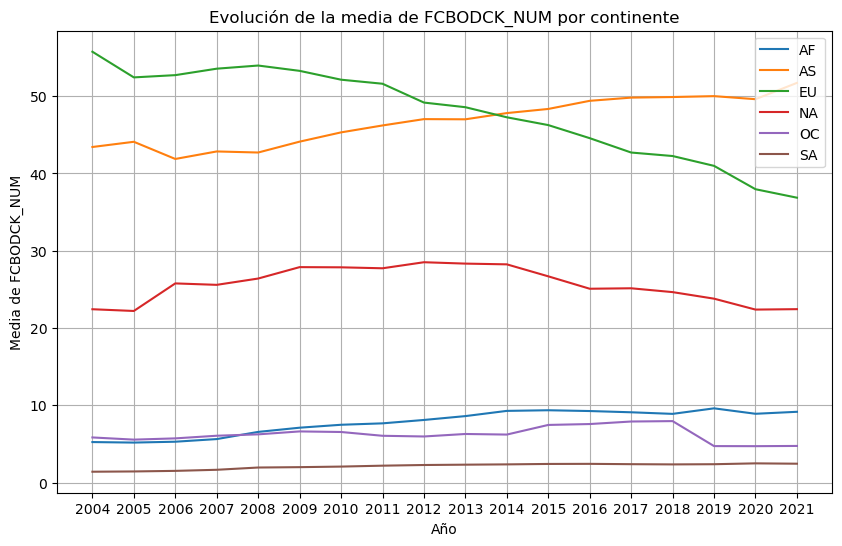

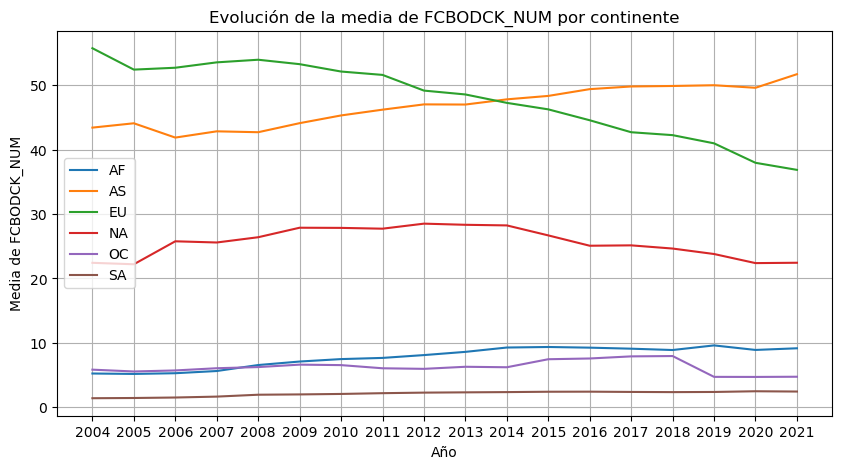

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

# Ejecutar la consulta de agregación
pipeline = [
    {
        "$match": {
            "Continent": {"$ne": "Unknown"},
            "FCBODCK_NUM": {"$exists": True, "$ne": None}
        }
    },
    {
        "$group": {
            "_id": {
                "Continent": "$Continent",
                "Time Period": "$Time Period"
            },
            "Average FCBODCK_NUM": {
                "$avg": "$FCBODCK_NUM"
            }
        }
    },
    {
        "$sort": {
            "_id.Time Period": 1,
            "_id.Continent": 1
        }
    }
]

results = list(collection.aggregate(pipeline))  # Convertir a lista para crear DataFrame

# Crear DataFrame a partir de los resultados
df = pd.DataFrame([
    {
        'Continent': result['_id']['Continent'], 
        'Time Period': result['_id']['Time Period'], 
        'Average FCBODCK_NUM': result['Average FCBODCK_NUM']
    } 
    for result in results
])

# Remodelar el DataFrame para que cada continente sea una columna
df_pivot = df.pivot(index='Time Period', columns='Continent', values='Average FCBODCK_NUM')

# Graficar los resultados
plt.figure(figsize=(10,6))

for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], label=column)

plt.title('Evolución de la media de FCBODCK_NUM por continente')
plt.xlabel('Año')
plt.ylabel('Media de FCBODCK_NUM')
plt.legend()
plt.grid(True)
plt.show()

results = list(collection.aggregate(pipeline))  # Convertir a lista para crear DataFrame

# Crear DataFrame a partir de los resultados
df = pd.DataFrame([
    {
        'Continent': result['_id']['Continent'], 
        'Time Period': result['_id']['Time Period'], 
        'Average FCBODCK_NUM': result['Average FCBODCK_NUM']
    } 
    for result in results
])

# Remodelar el DataFrame para que cada continente sea una columna
df_pivot = df.pivot(index='Time Period', columns='Continent', values='Average FCBODCK_NUM')

# Graficar los resultados
plt.figure(figsize=(10,5))

for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], label=column)

plt.title('Evolución de la media de FCBODCK_NUM por continente')
plt.xlabel('Año')
plt.ylabel('Media de FCBODCK_NUM')
plt.legend()
plt.grid(True)
plt.show()


En la gráfica se aprecia mejor la evolución del número de oficinas bancarias por continente, aparte de la clara ventaja que tienen EU, Asia y North America sobre el resto, me parece muy interesante el descenso de sucursales en europa, el cual comenzó a raíz de la crisis económica de 2008 y se ha mantenido por como se ha transformado el sector bancario gracias a las tecnologías.

Por último, voy a crear un campo array que muestre tanto el número de cajeros automáticos por 1000 KM2 y por 100.000 adultos, que puede ser interesante para medir el campo de diferentes maneras:

In [ ]:
# Convertir el campo "FCAK_NUM" a float
cursor = collection.find({"FCAK_NUM": {"$exists": True}})
for doc in cursor:
    try:
        value = float(doc["FCAK_NUM"])
        collection.update_one({"_id": doc["_id"]}, {"$set": {"FCAK_NUM": value}})
    except ValueError as e:
        print(f"Error converting FCAK_NUM in document ID {doc['_id']}: {e}")

# Convertir el campo "FCAA_NUM" a float
cursor = collection.find({"FCAA_NUM": {"$exists": True}})
for doc in cursor:
    try:
        value = float(doc["FCAA_NUM"])
        collection.update_one({"_id": doc["_id"]}, {"$set": {"FCAA_NUM": value}})
    except ValueError as e:
        print(f"Error converting FCAA_NUM in document ID {doc['_id']}: {e}")
#No lo corro para que no salten todos los errores

In [103]:
pipeline = [
    {
        "$set": {
            "FCAK_NUM": { "$cond": [ { "$eq": [ "$FCAK_NUM", "" ] }, None, "$FCAK_NUM" ] },
            "FCAA_NUM": { "$cond": [ { "$eq": [ "$FCAA_NUM", "" ] }, None, "$FCAA_NUM" ] }
        }
    },
    {
        "$addFields": {
            "N_ATM_KM2/ADULTS": {
                "$concatArrays": [
                    { "$ifNull": [ { "$literal": [ "$FCAK_NUM" ] }, [] ] },
                    { "$ifNull": [ { "$literal": [ "$FCAA_NUM" ] }, [] ] }
                ]
            }
        }
    },
    {
        "$project": {
            "FCAK_NUM": 0,
            "FCAA_NUM": 0
        }
    }
]

results = list(collection.aggregate(pipeline))[:1]

# mostrar resultados
for result in results:
    print(result)
    

{'_id': ObjectId('64667ddee3cc81f0117e7fac'), 'Country Name': 'Niger', 'Time Period': '2004', '': '', 'FCBODCK_NUM': 0.027630851819689, 'FCAODCHMMA_NUM': '', 'FCAODCHFFA_NUM': '', 'FCMIBT_NUM': '', 'FCROFNMF_NUM': '', 'N_DEPOSITS': {'M': '', 'F': ''}, 'Continent': 'AF', 'N_ATM_KM2/ADULTS': ['$FCAK_NUM', '$FCAA_NUM']}


Se puede ver como se crea correctamente el array y se podría utilizar para visualizar el número de cajeros.

# # Conclusiones

A pesar de que los datos con los que hemos trabajado no son los mejores para este tipo de ejercicios, se ha podido evaluar en cierta medida el acceso a finanzas básicas a nivel país y continente, así como ver una diferenciación por género. 